In [183]:
from linares_plot import *
import os

In [184]:
root='C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo'
filenames = os.listdir(root)   
files_wmloc=[]

for file in filenames: 
    path_sess = os.path.join( root, file)
    #print(path_sess)
    dirs_sess = os.listdir(path_sess)
    for i in range(len(dirs_sess)):
        if dirs_sess[i].find("WM_mapping") != -1:
            path_wm_file =  os.path.join( path_sess, dirs_sess[i] )
            if path_wm_file.find(".py")==-1: # remove .py
                wm_file = os.listdir(path_wm_file)[0]
                path_wm_file_txt = os.path.join(path_wm_file, wm_file)
                files_wmloc.append( path_wm_file_txt)


            
files_wmloc;

In [185]:
def files_subj(subject, files_wmloc):
    subject_files=[]
    for i in range(len(files_wmloc)):
        if files_wmloc[i].find(subject) != -1:
            subject_files.append(files_wmloc[i])
    #
    return subject_files


files_subj('d001', files_wmloc)

['C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20180829\\d001_29082018_WM_mapping\\d001_29082018_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20180911\\d001_110918_1_WM_mapping\\d001_110918_1_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20180912\\d001_120918_2_WM_mapping\\d001_120918_2_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20181001\\d001_011018_1_WM_mapping\\d001_011018_1_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20181001\\d001_011018_2_WM_mapping\\d001_011018_2_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20181001\\d001_011018_3_WM_mapping\\d001_011018_3_beh_map_.txt',
 'C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\20181001\\d001_011018_4_WM_mapping\\d001_011018_4_beh_map_.txt']

## Average subject

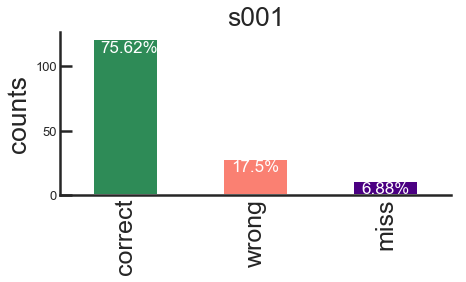

Total number of trials s001: 160


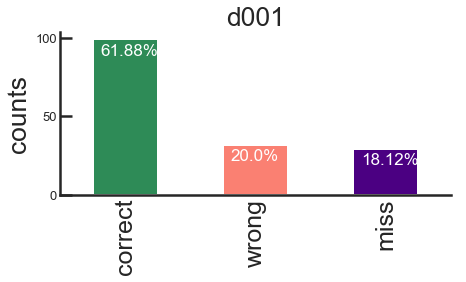

Total number of trials d001: 160


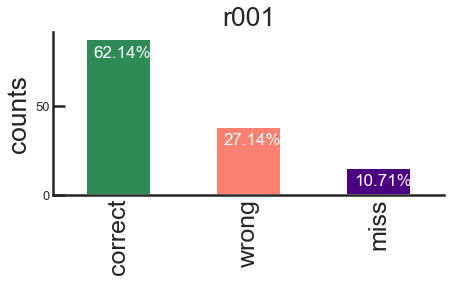

Total number of trials r001: 140


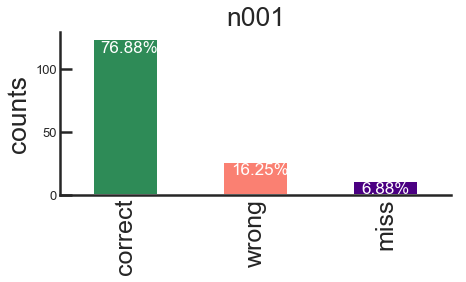

Total number of trials n001: 160


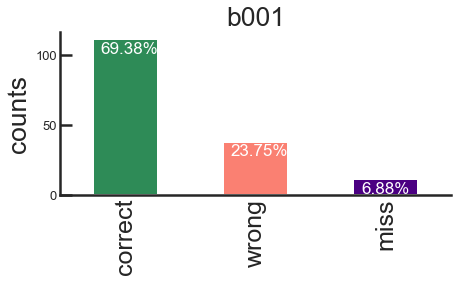

Total number of trials b001: 160


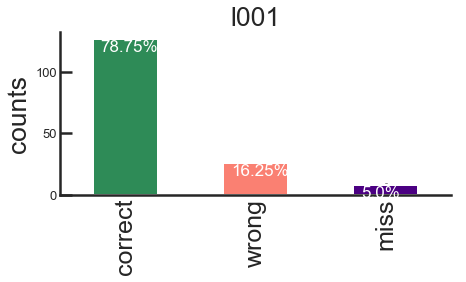

Total number of trials l001: 160


In [189]:
for subj in ['s001', 'd001', 'r001', 'n001', 'b001', 'l001']:
    files = files_subj(subj, files_wmloc)
    if subj=='d001':
        files=files[-4:]

    files_subjectt=[]
    for idx, file in enumerate(files):
        #print(file)
        df = pd.read_csv(file, sep=" ") 
        df =df[['first_second', 'radius', 'angle_t1', 'angle_t2', 'angle_p1', 'angle_p2', 'correct_direction', 'Response', 'C_I_M', 'start_trial',
                'presentation_checkboard_time', 'presentation_target_time', 'start_delay',  'end_delay', 'presentation_probe_time', 'response_time' ]]
        ####
        if sum(df['C_I_M']==1) > sum(df['C_I_M']==0):
            df['CIM']=df['C_I_M'].replace([0,1,999], ['wrong', 'correct', 'miss'])
        elif sum(df['C_I_M']==0) > sum(df['C_I_M']==1):
            df['CIM']=df['C_I_M'].replace([0,1,999], ['correct', 'wrong', 'miss'])
        else:
            print('Exclude')  
        ## plot every session
        #plt.figure()
        df_=df.iloc[1:, :]
    #     ax = df_['CIM'].value_counts().plot(kind='bar', figsize=(7,3), 
    #                                         color=["seagreen", "salmon" , "indigo"], 
    #                                         fontsize=13);
    #     #
    #     totals = []
    #     for i in ax.patches:
    #         totals.append(i.get_height())
    #     #
    #     total = sum(totals)
    #     for i in ax.patches:
    #         ax.text(i.get_x()+.08, i.get_height()-3, \
    #                 str(round((i.get_height()/total)*100, 2))+'%', fontsize=17,
    #                     color='white')
    #     #
    #     plt.xticks([0,1,2], ['correct', 'wrong', 'miss'], fontsize=25)
    #     plt.yticks([0, 10, 20, 30],  fontsize=25)
    #     plt.ylabel('counts')
    #     plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
    #     plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    #     plt.gca().get_xaxis().tick_bottom()                                                                                         
    #     plt.gca().get_yaxis().tick_left()
    #     plt.gca().tick_params(direction='in') #direction    
    #     plt.title(subj + ', sess: '+ str(idx));
    #     plt.show()

        files_subjectt.append(df_)



    df_ = pd.concat(files_subjectt)

    plt.figure()
    ax = df_['CIM'].value_counts().plot(kind='bar', figsize=(7,3), 
                                        color=["seagreen", "salmon" , "indigo"], 
                                        fontsize=13);
    #
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    #
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x()+.06, i.get_height()-10, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=17,
                    color='white')
    #
    plt.xticks([0,1,2], ['correct', 'wrong', 'miss'], fontsize=25)
    #plt.yticks([0, 10, 20, 30],  fontsize=25)
    plt.ylabel('counts')
    plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction    
    plt.title(subj);
    plt.show()
    print('Total number of trials ' + subj + ': ' + str(len(df_)))
    

    
    

## All sessions 

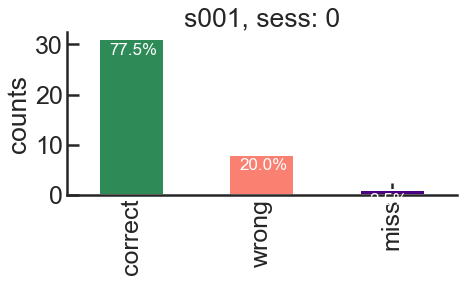

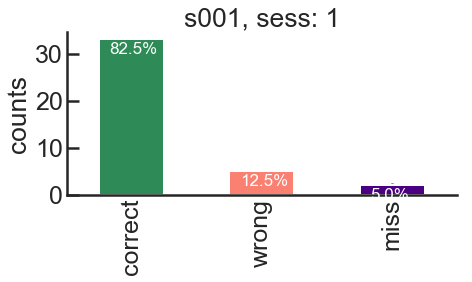

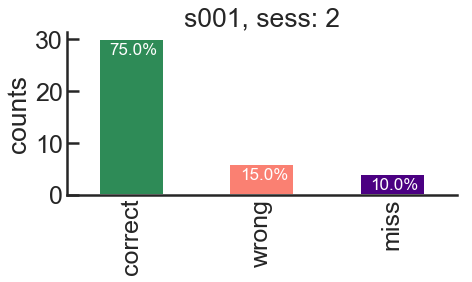

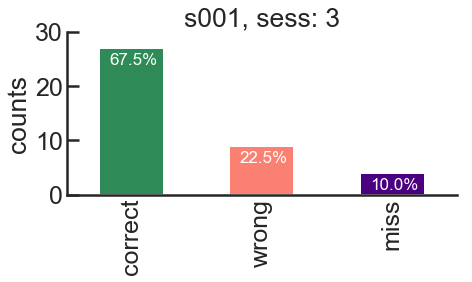

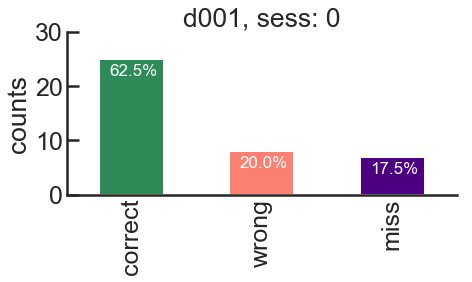

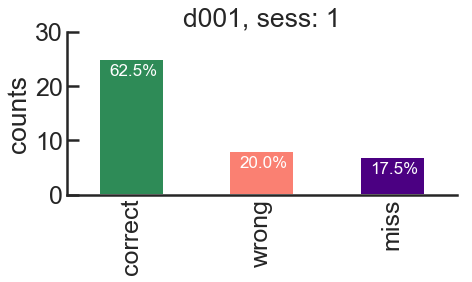

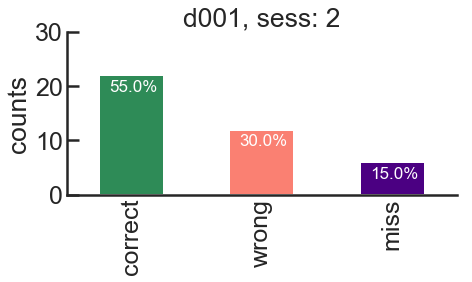

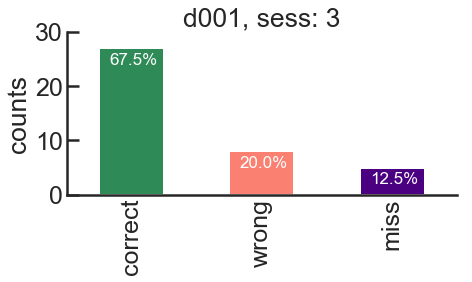

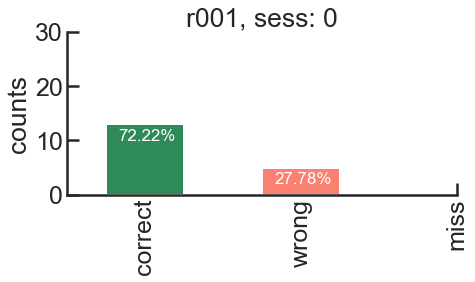

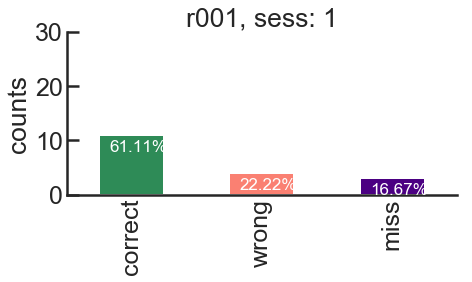

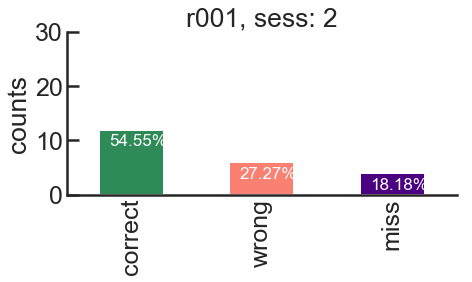

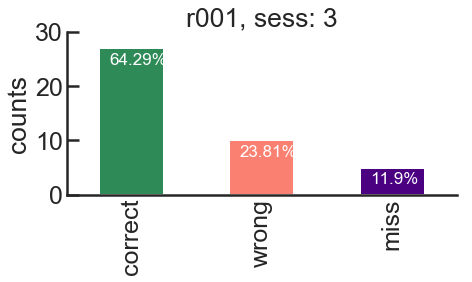

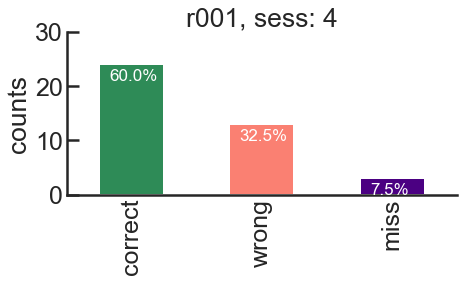

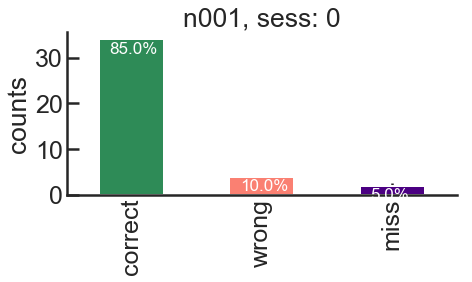

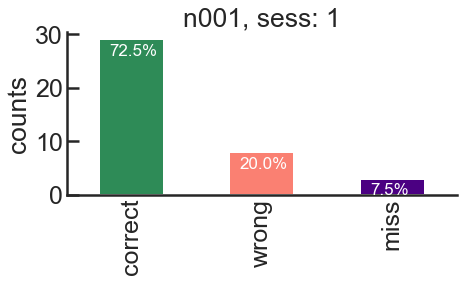

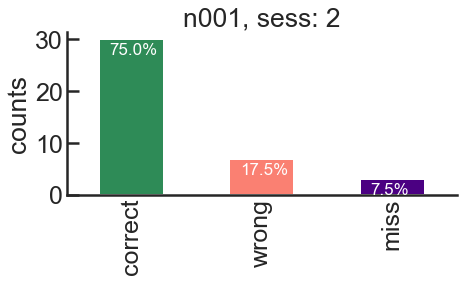

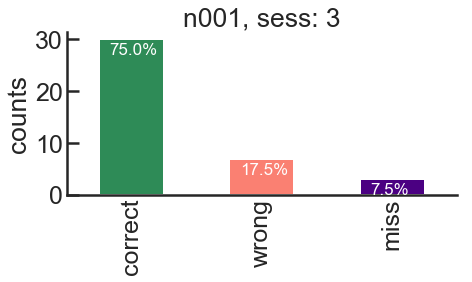

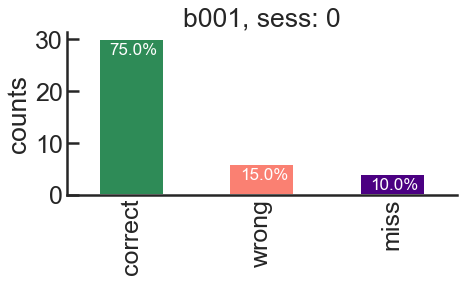

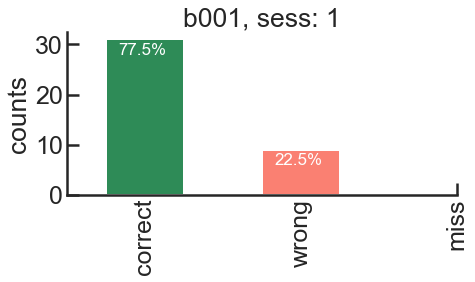

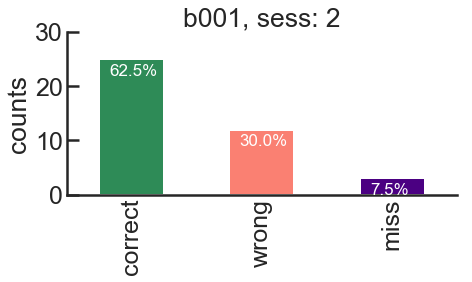

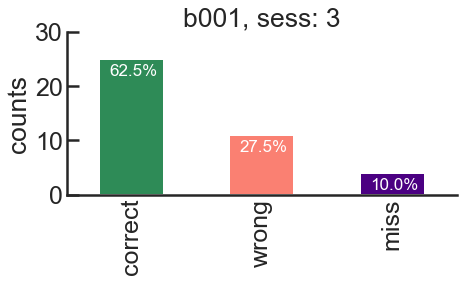

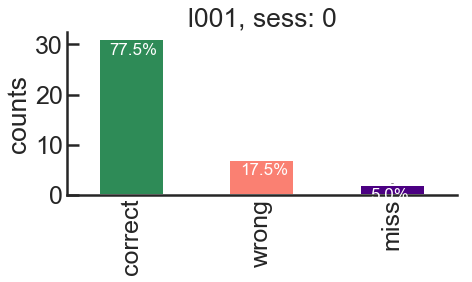

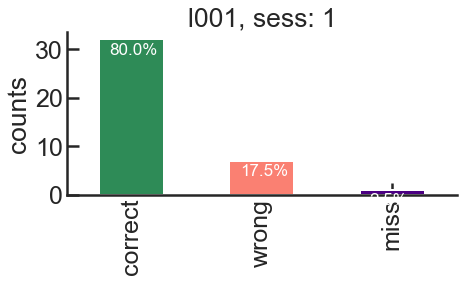

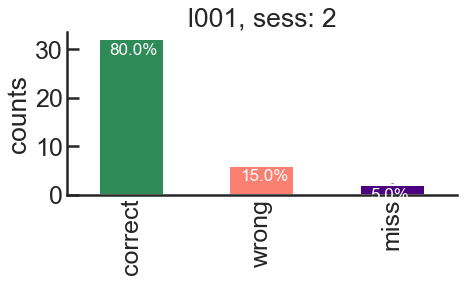

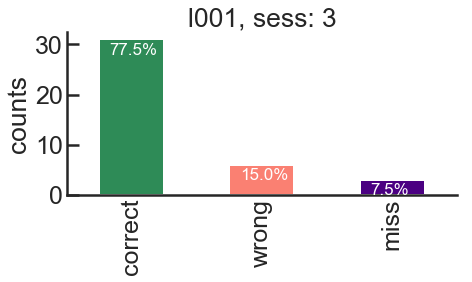

In [187]:
for subj in ['s001', 'd001', 'r001', 'n001', 'b001', 'l001']:
    files = files_subj(subj, files_wmloc)
    if subj=='d001':
        files=files[-4:]

    for idx, file in enumerate(files):
        #print(file)
        df = pd.read_csv(file, sep=" ") 
        df =df[['first_second', 'radius', 'angle_t1', 'angle_t2', 'angle_p1', 'angle_p2', 'correct_direction', 'Response', 'C_I_M', 'start_trial',
                'presentation_checkboard_time', 'presentation_target_time', 'start_delay',  'end_delay', 'presentation_probe_time', 'response_time' ]]
        ####
        if sum(df['C_I_M']==1) > sum(df['C_I_M']==0):
            df['CIM']=df['C_I_M'].replace([0,1,999], ['wrong', 'correct', 'miss'])
        elif sum(df['C_I_M']==0) > sum(df['C_I_M']==1):
            df['CIM']=df['C_I_M'].replace([0,1,999], ['correct', 'wrong', 'miss'])
        else:
            print('Exclude')  
        ## plot every session
        #plt.figure()
        df_=df.iloc[1:, :]
        ax = df_['CIM'].value_counts().plot(kind='bar', figsize=(7,3), 
                                            color=["seagreen", "salmon" , "indigo"], 
                                            fontsize=13);
        #
        totals = []
        for i in ax.patches:
            totals.append(i.get_height())
        #
        total = sum(totals)
        for i in ax.patches:
            ax.text(i.get_x()+.08, i.get_height()-3, \
                    str(round((i.get_height()/total)*100, 2))+'%', fontsize=17,
                        color='white')
        #
        plt.xticks([0,1,2], ['correct', 'wrong', 'miss'], fontsize=25)
        plt.yticks([0, 10, 20, 30],  fontsize=25)
        plt.ylabel('counts')
        plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction    
        plt.title(subj + ', sess: '+ str(idx));
        plt.show()







    